<a href="https://colab.research.google.com/github/Jheel-patel/Deep-Learning-Cats-Dogs/blob/master/MNSIT_with_96_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

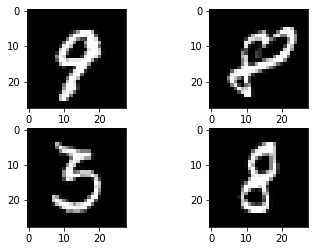

In [8]:
#Importing All required Library

import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout,BatchNormalization
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

#Specify 'channels_first' to be the dimension ordering convention Keras will follow.
tf.keras.backend.set_image_data_format('channels_first')

# Load dataset (download if needed)
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

#Extracting the validation set
from sklearn.model_selection import train_test_split

X_train,X_val, y_train,y_val = train_test_split(X_train,y_train,test_size=.3)

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

#Pre-processing Data


In [0]:
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float64')
X_val = X_val.reshape(X_val.shape[0],1,28,28).astype('float64')

X_train = X_train/255
X_val = X_val/255

#one hot encoding output y

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

#total number of classes 
num_classes = y_train.shape[1]

#input shape
rows = X_train.shape[2]
cols = X_train.shape[3]

In [0]:
#data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define data preparation
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1)

# fit parameters from data
datagen.fit(X_train,augment=True)

# get transformed images
train_size = X_train.shape[0]
augment_size=42000
randidx = np.random.randint(train_size, size=augment_size)
X_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
X_augmented = datagen.flow(X_augmented, np.zeros(augment_size),
                                    batch_size=augment_size, shuffle=False).next()[0]

# append augmented data to trainset
X_train = np.concatenate((X_train, X_augmented))
y_train = np.concatenate((y_train, y_augmented))
train_size = X_train.shape[0]

In [0]:
# defining a baseline model

def baseline_model():
    model = tf.keras.Sequential([
                                 Conv2D(32,kernel_size=3,activation='relu',input_shape=(1,rows,cols)),
                                 BatchNormalization(),
                                 Conv2D(32,kernel_size=3,activation='relu'),
                                 BatchNormalization(),
                                 Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'),
                                 BatchNormalization(),
                                 Dropout(0.4),

                                 Conv2D(64,kernel_size=3,activation='relu'),
                                 BatchNormalization(),
                                 Conv2D(64,kernel_size=3,activation='relu'),
                                 BatchNormalization(),
                                 Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'),
                                 BatchNormalization(),
                                 Dropout(0.4),

                                 Flatten(),
                                 Dense(128,activation='relu'),
                                 BatchNormalization(),
                                 Dropout(0.4),
                                 Dense(num_classes,activation='softmax')
                                ]) 

    model.summary()
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [13]:
#Build a model

model = baseline_model()
BATCH_SIZE=32
#Train the model
model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=BATCH_SIZE,epochs=30, verbose=2)

model.save('model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 26, 26)        104       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 24, 24)        96        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 12, 12)        25632     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 12, 12)        48        
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 12, 12)       

In [14]:
# Final eval
X_test1 = X_test.reshape(X_test.shape[0],1,28,28).astype('float64')
y_test1 = to_categorical(y_test)

scores = model.evaluate(X_test1, y_test1,verbose=1)
print("CNN error: %.2f%%" % (100 - scores[1]*100))

10000/10000 [==============================] - 1s 134us/sample - loss: 4.1309 - accuracy: 0.9668
CNN error: 3.32%


In [15]:
scores

[4.130909644347374, 0.9668]